In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ap= pd.read_csv('apst.csv',index_col=False )

In [3]:
ap.tail()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
7192,1170406182,Shark Boom - Challenge Friends with your Pet,245415936,USD,0.0,0,0,0.0,0.0,1.0.9,4+,Games,38,5,1,1
7193,1069830936,【謎解き】ヤミすぎ彼女からのメッセージ,16808960,USD,0.0,0,0,0.0,0.0,1.2,9+,Book,38,0,1,1
7194,1070052833,Go!Go!Cat!,91468800,USD,0.0,0,0,0.0,0.0,1.1.2,12+,Games,37,2,2,1
7195,1081295232,Suppin Detective: Expose their true visage!,83026944,USD,0.0,0,0,0.0,0.0,1.0.3,12+,Entertainment,40,0,1,1
7196,977965019,みんなのお弁当 by クックパッド ~お弁当をレシピ付きで記録・共有~,51174400,USD,0.0,0,0,0.0,0.0,1.4.0,4+,Food & Drink,37,0,1,1


In [4]:
ap.drop(['id', 'track_name', 'size_bytes', 'currency', 'price',
         'ver', 'cont_rating', 'prime_genre','vpp_lic'],axis = 1, inplace= True)

In [5]:
ap.columns


Index(['rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num'],
      dtype='object')

In [6]:
ap.head()

,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num
0,2974676,212,3.5,3.5,37,1,29
1,2161558,1289,4.5,4.0,37,0,29
2,2130805,579,4.5,4.5,38,5,18
3,1724546,3842,4.5,4.0,40,5,1
4,1126879,3594,4.0,4.5,37,4,1


In [7]:
ap.tail(200)

,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num
6997,0,0,0.0,0.0,37,5,2
6998,0,0,0.0,0.0,40,4,2
6999,0,0,0.0,0.0,38,0,1
7000,0,0,0.0,0.0,40,4,1
7001,0,0,0.0,0.0,40,3,1
...,...,...,...,...,...,...,...
7192,0,0,0.0,0.0,38,5,1
7193,0,0,0.0,0.0,38,0,1
7194,0,0,0.0,0.0,37,2,2
7195,0,0,0.0,0.0,40,0,1


In [8]:
from sklearn.model_selection import train_test_split

In [123]:
X = ap.drop('user_rating',axis =1)
y = ap['user_rating']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34)

In [11]:
y_test

4580    4.0
3088    4.5
6241    3.0
5553    1.5
5022    4.0
       ... 
1802    4.0
2064    4.0
5533    5.0
6806    0.0
3731    5.0
Name: user_rating, Length: 2447, dtype: float64

In [12]:
unsn = ap.sample(10)
unsn_x = unsn.drop('user_rating',axis =1)
unsn_y = unsn['user_rating']

In [13]:
from sklearn.linear_model import LinearRegression

# Linear Regression

In [14]:
lnrg = LinearRegression()

In [15]:
lnrg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lmprediction = lnrg.predict(X_test)

In [17]:
from scipy.stats import pearsonr
lmcorr, _ = pearsonr(lmprediction, y_test)
print('Pearsons correlation: %.3f' % lmcorr)

Pearsons correlation: 0.776


In [18]:
from sklearn.metrics import mean_absolute_error
lmmae=mean_absolute_error(y_test, lmprediction).round(3)

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [20]:
lmmsqe=mean_squared_error(y_test, lmprediction)

In [21]:
lmrms = sqrt(mean_squared_error(y_test, lmprediction))

In [165]:
print('Linear Regression')
print('Coeefficient Correlation: %.3f'%lmcorr)
print('Mean Absolute Error: %.3f'%lmmae)
print('Mean Squre Root Error: %.3f'%lmmsqe)
print('Root Mean Squre Error: %.3f'%lmrms)

Linear Regression
Coeefficient Correlation: 0.776
Mean Absolute Error: 0.651
Mean Squre Root Error: 0.940
Root Mean Squre Error: 0.970


# SVM

In [23]:
from sklearn.svm import SVR

In [24]:
svc_mdl = SVR()
svc_mdl.fit(X_train,y_train)

C:\Users\cafeo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
predsvm = svc_mdl.predict(X_test)

In [26]:
svmcorr, _ = pearsonr(predsvm, y_test)
print('Pearsons correlation: %.3f' % svmcorr)

Pearsons correlation: 0.909


In [27]:
svmmae=mean_absolute_error(y_test, predsvm).round(3)
svmmsqe=mean_squared_error(y_test, predsvm)
svmrms = sqrt(mean_squared_error(y_test, predsvm))

In [164]:
print('SVM')
print('Coeefficient Correlation: %.3f'%svmcorr)
print('Mean Absolute Error: %.3f'%svmmae)
print('Mean Squre Root Error: %.3f'%svmmsqe)
print('Root Mean Squre Error: %.3f'%svmrms)

SVM
Coeefficient Correlation: 0.909
Mean Absolute Error: 0.451
Mean Squre Root Error: 0.413
Root Mean Squre Error: 0.643


In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rfc = RandomForestRegressor(n_estimators=600)

In [31]:
rfc.fit(X_train,y_train)
predrf = rfc.predict(X_test)

In [32]:
rfcorr, _ = pearsonr(predrf, y_test)
rfmae=mean_absolute_error(y_test, predrf).round(3)
rfmsqe=mean_squared_error(y_test, predrf)
rfrms = sqrt(mean_squared_error(y_test, predrf))
print('Coeefficient Correlation: %.3f'%rfcorr)
print('Mean Absolute Error: %.3f'%rfmae)
print('Mean Squre Root Error: %.3f'%rfmsqe)
print('Root Mean Squre Error: %.3f'%rfrms)

Coeefficient Correlation: 0.951
Mean Absolute Error: 0.293
Mean Squre Root Error: 0.227
Root Mean Squre Error: 0.476


# Decision Tree


In [140]:
from sklearn.tree import DecisionTreeRegressor

In [141]:
dtr = DecisionTreeRegressor()

In [142]:
dtr.fit(X_train,y_train)
predtr = dtr.predict(X_test)

In [166]:
dtrcorr, _ = pearsonr(predtr, y_test)
dtrmae=mean_absolute_error(y_test, predtr).round(3)
dtrmsqe=mean_squared_error(y_test, predtr)
dtrrms = sqrt(mean_squared_error(y_test, predtr))
print('Decision Tree')
print('Coeefficient Correlation: %.3f'%dtrcorr)
print('Mean Absolute Error: %.3f'%dtrmae)
print('Mean Squre Root Error: %.3f'%dtrmsqe)
print('Root Mean Squre Error: %.3f'%dtrrms)

Decision Tree
Coeefficient Correlation: nan
Mean Absolute Error: 0.359
Mean Squre Root Error: 0.388
Root Mean Squre Error: 0.623


# ANN

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.13.1


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [39]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [81]:
X = ap.drop('user_rating',axis =1).values
y = ap['user_rating'].values
X = X.astype(float)
y = y.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

In [82]:
model = Sequential([
    Dense(units=1),
    Dense(units=1),
    Dense(units=1)
])

In [83]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

In [84]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [85]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
4750/4750 [==============================] - 0s 96us/sample - loss: 19776.9720
Epoch 2/250
4750/4750 [==============================] - 0s 38us/sample - loss: 522.9457
Epoch 3/250
4750/4750 [==============================] - 0s 35us/sample - loss: 52.6476
Epoch 4/250
4750/4750 [==============================] - 0s 31us/sample - loss: 15.9865
Epoch 5/250
4750/4750 [==============================] - 0s 32us/sample - loss: 12.5313
Epoch 6/250
4750/4750 [==============================] - 0s 43us/sample - loss: 14.8747
Epoch 7/250
4750/4750 [==============================] - 0s 40us/sample - loss: 10.1912
Epoch 8/250
4750/4750 [==============================] - 0s 42us/sample - loss: 8.4109
Epoch 9/250
4750/4750 [==============================] - 0s 42us/sample - loss: 11.7345
Epoch 10/250
4750/4750 [==============================] - 0s 52us/sample - loss: 5.8398
Epoch 11/250
4750/4750 [==============================] - 0s 50us/sample - loss: 4.6117
Epoch 12/250
4750/4750 [=====

4750/4750 [==============================] - 0s 31us/sample - loss: 2.5154
Epoch 94/250
4750/4750 [==============================] - 0s 30us/sample - loss: 1.6777
Epoch 95/250
4750/4750 [==============================] - 0s 32us/sample - loss: 8.3012
Epoch 96/250
4750/4750 [==============================] - 0s 44us/sample - loss: 1.8254
Epoch 97/250
4750/4750 [==============================] - 0s 35us/sample - loss: 1.8161
Epoch 98/250
4750/4750 [==============================] - 0s 29us/sample - loss: 2.3564
Epoch 99/250
4750/4750 [==============================] - 0s 31us/sample - loss: 1.8442
Epoch 100/250
4750/4750 [==============================] - 0s 30us/sample - loss: 1.8080
Epoch 101/250
4750/4750 [==============================] - 0s 31us/sample - loss: 2.1202
Epoch 102/250
4750/4750 [==============================] - 0s 41us/sample - loss: 1.7353
Epoch 103/250
4750/4750 [==============================] - 0s 39us/sample - loss: 1.8694
Epoch 104/250
4750/4750 [================

4750/4750 [==============================] - 0s 32us/sample - loss: 1.2614
Epoch 186/250
4750/4750 [==============================] - 0s 31us/sample - loss: 1.3673
Epoch 187/250
4750/4750 [==============================] - 0s 30us/sample - loss: 1.3651
Epoch 188/250
4750/4750 [==============================] - 0s 30us/sample - loss: 3.9079
Epoch 189/250
4750/4750 [==============================] - 0s 30us/sample - loss: 1.2169
Epoch 190/250
4750/4750 [==============================] - 0s 35us/sample - loss: 2.4815
Epoch 191/250
4750/4750 [==============================] - 0s 39us/sample - loss: 1.3107
Epoch 192/250
4750/4750 [==============================] - 0s 36us/sample - loss: 1.3379
Epoch 193/250
4750/4750 [==============================] - 0s 32us/sample - loss: 1.3852
Epoch 194/250
4750/4750 [==============================] - 0s 29us/sample - loss: 1.2609
Epoch 195/250
4750/4750 [==============================] - 0s 50us/sample - loss: 1.1717
Epoch 196/250
4750/4750 [==========

In [86]:
predtf = model.predict(X_test)


In [88]:
from itertools import chain
predtf = list(chain(*predtf))
predtf = np.array(predtf)


In [89]:
predtf

array([4.257847 , 4.6639876, 1.3026108, ..., 4.6456866, 4.5599093,
       4.1641645], dtype=float32)

In [92]:
tfmae=mean_absolute_error(y_test, predtf).round(3)
tfmsqe=mean_squared_error(y_test, predtf)
tfrms = sqrt(mean_squared_error(y_test, predtf))
tfcorr, _ = pearsonr(predtf, y_test)

In [167]:
print('ANN')
print('Pearsons correlation: %.3f' % tfcorr)
print('Mean Absolute Error: %.3f'%tfmae)
print('Mean Squre Root Error: %.3f'%tfmsqe)
print('Root Mean Squre Error: %.3f'%tfrms)


ANN
Pearsons correlation: 0.788
Mean Absolute Error: 0.671
Mean Squre Root Error: 0.831
Root Mean Squre Error: 0.912


# Random Forest

In [168]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=600)
rfc.fit(X_train,y_train)

rfpred = rfc.predict(X_test)
rfmae=mean_absolute_error(y_test, rfpred).round(3)
rfmsqe=mean_squared_error(y_test, rfpred)
rfrms = sqrt(mean_squared_error(y_test, rfpred))
rfcorr, _ = pearsonr(rfpred, y_test)
print('Random Forest')
print('Pearsons correlation: %.3f' % rfcorr)
print('Mean Absolute Error: %.3f'%rfmae)
print('Mean Squre Root Error: %.3f'%rfmsqe)
print('Root Mean Squre Error: %.3f'%rfrms)

Random Forest
Pearsons correlation: 0.954
Mean Absolute Error: 0.286
Mean Squre Root Error: 0.217
Root Mean Squre Error: 0.466


# Result

Text(0.5, 1.0, 'Correlation Coefficient ')

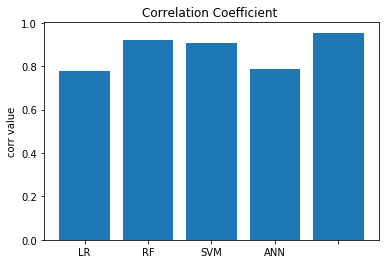

In [162]:
corrobjects = ('LR', 'DT', 'SVM', 'ANN','RF')
y_pos = np.arange(len(corrobjects))
corrperformance = [lmcorr,dtrcorr,svmcorr,tfcorr,rfcorr]
plt.bar(y_pos, corrperformance, align='center',)
plt.xticks(y_pos, objects)
plt.ylabel('corr value')
plt.title('Correlation Coefficient ')

Text(0.5, 1.0, 'Mean Abs Error ')

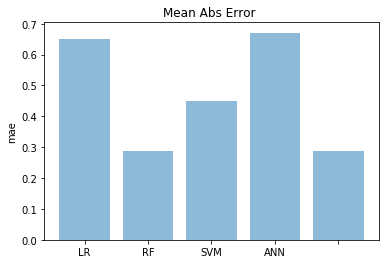

In [156]:
maeobjects = ('LR', 'RF', 'SVM', 'ANN','RF')
y_pos = np.arange(len(maeobjects))
maeperformance = [lmmae,rfmae,svmmae,tfmae,rfmae]
plt.bar(y_pos, maeperformance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('mae')
plt.title('Mean Abs Error ')

Text(0.5, 1.0, 'Mean sqrt Error ')

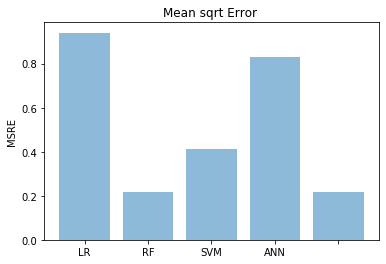

In [157]:
msqrtobjects = ('LR', 'RF', 'SVM', 'ANN','RF')
y_pos = np.arange(len(msqrtobjects))
msqrtperformance = [lmmsqe,rfmsqe,svmmsqe,tfmsqe,rfmsqe]
plt.bar(y_pos, msqrtperformance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('MSRE')
plt.title('Mean sqrt Error ')

Text(0.5, 1.0, 'Root Mean sqrt Error ')

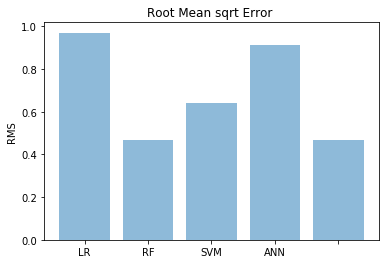

In [158]:
rmsqrtobjects = ('LR', 'RF', 'SVM', 'ANN','RF')
y_pos = np.arange(len(rmsqrtobjects))
rmsqrtperformance = [lmrms,rfrms,svmrms,tfrms,rfrms]
plt.bar(y_pos, rmsqrtperformance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('RMS')
plt.title('Root Mean sqrt Error ')

# Random Forest gives the best result with highest Correlation Coefficient and less errors